In [1384]:
import pandas as pd
import io
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.decomposition import PCA

In [1385]:
all_data=pd.read_csv("Mortality_09_UP.data",nrows=25175)

C:\Users\User\AppData\Local\Temp\ipykernel_2196\251105449.py:1: DtypeWarning: Columns (16,17,18,22,23,24,25,26,27,28,29,30,31,32,33,76) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data=pd.read_csv("Mortality_09_UP.data",nrows=25175)


In [1386]:
all_data

,id,m_id,client_m_id,hl_id,house_no,house_hold_no,state,district,rural,stratum_code,...,householdstatus,isheadchanged,fidh,fidx,as,wt,x,schedule_id,year,v126
0,712232,375.0,NaN,2944.0,63,3,9,58,1,1,...,NaN,NaN,NaN,2.944096e+10,-0.630351,68.37,NaN,4,1,NaN
1,712240,383.0,NaN,2997.0,28,1,9,58,1,1,...,NaN,NaN,NaN,2.997096e+10,-4.369212,68.37,NaN,4,1,NaN
2,109886,246.0,NaN,NaN,58,1,9,62,1,2,...,1.0,1.0,9.620340e+13,NaN,NaN,20.95,NaN,4,3,NaN
3,712216,359.0,NaN,2706.0,196,1,9,58,1,1,...,NaN,NaN,NaN,2.706096e+10,-2.996541,68.37,NaN,4,1,NaN
4,712224,367.0,NaN,2777.0,253,1,9,58,1,1,...,NaN,NaN,NaN,2.777096e+10,-3.951137,68.37,NaN,4,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25170,643135,410.0,401.0,6366.0,244,1,9,3,1,2,...,NaN,NaN,NaN,6.366090e+10,5.052841,54.85,NaN,4,1,NaN
25171,643143,938.0,1009.0,6483.0,66,1,9,3,1,2,...,NaN,NaN,NaN,6.483090e+10,0.292205,54.85,NaN,4,1,NaN
25172,102148,38.0,NaN,NaN,56,1,9,61,2,0,...,1.0,2.0,9.610740e+13,NaN,NaN,54.00,NaN,4,3,NaN
25173,643119,394.0,385.0,6140.0,34,1,9,3,1,2,...,NaN,NaN,NaN,6.140090e+10,-2.376460,54.85,NaN,4,1,NaN


In [1387]:
columns = ["age","sex", "highest_qualification", "rural", "disability_status", "is_water_filter", "chew", "smoke", "alcohol","treatment_source"]
death = all_data[columns].copy()

In [1388]:
for column in columns:
    death[column].fillna(death[column].mode()[0], inplace=True)


In [1389]:
death.columns

Index(['age', 'sex', 'highest_qualification', 'rural', 'disability_status',
       'is_water_filter', 'chew', 'smoke', 'alcohol', 'treatment_source'],
      dtype='object')

In [1390]:
death.isnull().sum()

age                      0
sex                      0
highest_qualification    0
rural                    0
disability_status        0
is_water_filter          0
chew                     0
smoke                    0
alcohol                  0
treatment_source         0
dtype: int64

In [1391]:
death

,age,sex,highest_qualification,rural,disability_status,is_water_filter,chew,smoke,alcohol,treatment_source
0,43.0,1.0,4.0,1,0.0,2.0,7.0,4.0,4.0,0.0
1,70.0,2.0,0.0,1,0.0,2.0,5.0,4.0,4.0,9.0
2,57.0,2.0,3.0,1,0.0,2.0,7.0,4.0,4.0,0.0
3,50.0,1.0,0.0,1,0.0,2.0,1.0,1.0,1.0,9.0
4,65.0,2.0,0.0,1,0.0,2.0,7.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25170,38.0,1.0,4.0,1,0.0,2.0,3.0,4.0,4.0,9.0
25171,38.0,2.0,0.0,1,0.0,2.0,7.0,4.0,4.0,8.0
25172,42.0,1.0,0.0,2,0.0,2.0,1.0,1.0,4.0,6.0
25173,35.0,1.0,0.0,1,0.0,2.0,7.0,1.0,4.0,8.0


In [1392]:
death.dtypes

age                      float64
sex                      float64
highest_qualification    float64
rural                      int64
disability_status        float64
is_water_filter          float64
chew                     float64
smoke                    float64
alcohol                  float64
treatment_source         float64
dtype: object

In [1393]:
x=death.drop('age',axis=1)
y=death['age']

In [1394]:
x.shape

(25175, 9)

In [1395]:
x.dtypes

sex                      float64
highest_qualification    float64
rural                      int64
disability_status        float64
is_water_filter          float64
chew                     float64
smoke                    float64
alcohol                  float64
treatment_source         float64
dtype: object

In [1396]:
y.shape

(25175,)

In [1397]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(x,y ,random_state=104,test_size=0.25,shuffle=True)

In [1398]:
X_train.shape

(18881, 9)

In [1399]:
import tensorflow as tf


In [1400]:
#Build model

model=tf.keras.Sequential()

In [1401]:
# bias=tf.keras.initializers.HeNormal()

# model.add(tf.keras.layers.Dense(10,kernel_initializer="he_normal",use_bias=True,activation='sigmoid',bias_initializer=bias,input_shape=(9,)))
# model.add(tf.keras.layers.Dense(20,kernel_initializer="he_normal",use_bias=True,activation='softmax',bias_initializer=bias))
# model.add(tf.keras.layers.Dense(1,kernel_initializer="he_normal",use_bias=True,activation='leaky_relu',bias_initializer=bias,input_shape=(9,)))

In [1402]:
# bias=tf.keras.initializers.HeNormal()

# model.add(tf.keras.layers.Dense(10,kernel_initializer="he_normal",use_bias=True,activation='sigmoid',bias_initializer=bias,input_shape=(9,)))
# model.add(tf.keras.layers.Dense(20,kernel_initializer="he_normal",use_bias=True,activation='softmax',bias_initializer=bias))
# model.add(tf.keras.layers.Dense(1,kernel_initializer="he_normal",use_bias=True,activation='sigmoid',bias_initializer=bias,input_shape=(9,)))

In [1403]:
import tensorflow as tf

bias=tf.keras.initializers.HeNormal()

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, kernel_initializer="he_normal", bias_initializer=bias, activation='sigmoid', input_shape=(9,)),
  tf.keras.layers.Dense(20, kernel_initializer="he_normal", bias_initializer=bias, activation='relu'),
  tf.keras.layers.Dense(1, kernel_initializer="he_normal", bias_initializer=bias, activation='swish', input_shape=(9,))
])


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [1404]:
model.summary()

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 10)                100       
                                                                 
 dense_155 (Dense)           (None, 20)                220       
                                                                 
 dense_156 (Dense)           (None, 1)                 21        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [1405]:
# model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss=tf.keras.losses.MeanAbsoluteError(),metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [1406]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss=tf.keras.losses.MeanAbsoluteError(),metrics=[tf.keras.metrics.RootMeanSquaredError() , 'accuracy'])

In [1407]:
# from sklearn.feature_selection import SelectFromModel

# sfm = SelectFromModel(model, threshold=0.1)
# sfm.fit(X_train, y_train)

# X_train_new = sfm.transform(X_train)
# X_test_new = sfm.transform(X_test)

In [1408]:
# import tensorflow as tf

# bias=tf.keras.initializers.HeNormal()

# modelNew = tf.keras.Sequential([
#   tf.keras.layers.Dense(10, kernel_initializer="he_normal", bias_initializer=bias, activation='sigmoid', input_shape=(9,)),
#   tf.keras.layers.Dense(20, kernel_initializer="he_normal", bias_initializer=bias, activation='relu'),
#   tf.keras.layers.Dense(1, kernel_initializer="he_normal", bias_initializer=bias, activation='swish', input_shape=(9,))
# ])


In [1409]:
# from sklearn.metrics import mean_squared_error

# y_pred = model_new.predict(X_test_new)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)


In [1410]:
# learning=modelNew.fit(X_train,y_train,epochs=20,batch_size=16,verbose=True)

In [1411]:
learning=model.fit(X_train,y_train,epochs=20,batch_size=16,verbose=True)

Epoch 1/20
1181/1181 [==============================] - 2s 1ms/step - loss: 12.7973 - root_mean_squared_error: 15.7310 - accuracy: 5.2963e-05
Epoch 2/20
1181/1181 [==============================] - 2s 1ms/step - loss: 12.6010 - root_mean_squared_error: 15.3433 - accuracy: 5.2963e-05
Epoch 3/20
1181/1181 [==============================] - 2s 1ms/step - loss: 12.4227 - root_mean_squared_error: 15.1228 - accuracy: 5.2963e-05
Epoch 4/20
1181/1181 [==============================] - 2s 1ms/step - loss: 12.4248 - root_mean_squared_error: 15.1133 - accuracy: 5.2963e-05
Epoch 5/20
1181/1181 [==============================] - 2s 1ms/step - loss: 12.3618 - root_mean_squared_error: 15.0477 - accuracy: 5.2963e-05
Epoch 6/20
1181/1181 [==============================] - 2s 1ms/step - loss: 12.1960 - root_mean_squared_error: 14.8501 - accuracy: 5.2963e-05
Epoch 7/20
1181/1181 [==============================] - 2s 1ms/step - loss: 12.2622 - root_mean_squared_error: 14.9445 - accuracy: 5.2963e-05
Epoch 

In [1412]:
import matplotlib.pyplot as plt

In [1413]:
def plot(learning):
  plt.plot(learning.history['loss'])
  plt.xlabel("epochs")
  plt.ylabel("Cost")

  plt.show()


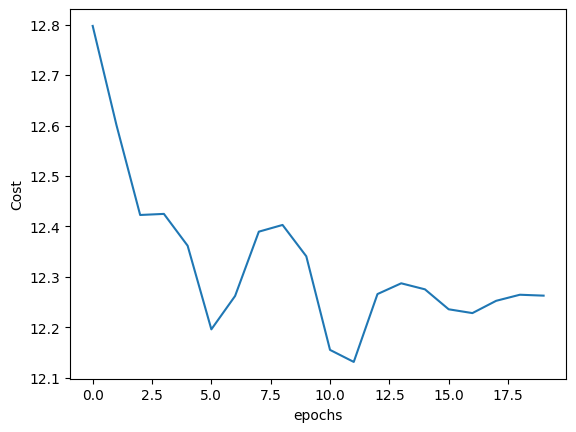

In [1414]:
plot(learning)

In [1415]:
model.weights

[<tf.Variable 'dense_154/kernel:0' shape=(9, 10) dtype=float32, numpy=
 array([[  3.27516   ,   2.3514044 ,   1.3031745 ,   3.7919385 ,
          -1.8620963 ,  -1.9916608 ,   5.846959  ,   5.479238  ,
          -1.3359143 ,   3.233452  ],
        [ -0.10055746,   1.0182989 ,   2.0166204 ,   0.6306058 ,
          -4.00267   ,  -4.738261  , -33.927578  ,   1.2855581 ,
           9.796499  ,   1.32781   ],
        [  2.7613437 ,   2.757844  ,   1.8418496 ,   2.6342447 ,
          -2.6879694 ,   0.7463182 ,  -5.0874176 ,   3.2095003 ,
           0.95064586,   3.5819657 ],
        [  2.963814  ,   2.7972019 ,   5.3614836 ,   1.4105132 ,
          -1.1820303 ,  -8.168841  ,  35.578037  ,   3.6662316 ,
           8.404678  ,   5.130933  ],
        [  4.1333795 ,   1.6603607 ,   2.265358  ,   4.996158  ,
          -3.4851887 ,  -4.041847  ,  -8.478519  ,   4.209988  ,
           3.560222  ,   3.6055787 ],
        [  1.5791516 ,   1.305279  ,   0.5164228 ,   0.25923318,
          -4.0080314 ,  

In [1416]:
import joblib

joblib.dump(model,"model2.pkl")

['model2.pkl']

In [1417]:
#loading
p_model=joblib.load("model2.pkl")

In [1418]:
p_model.summary()

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 10)                100       
                                                                 
 dense_155 (Dense)           (None, 20)                220       
                                                                 
 dense_156 (Dense)           (None, 1)                 21        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [1419]:
p_model.predict(X_test)

197/197 [==============================] - 0s 1ms/step


array([[46.161526],
       [46.161526],
       [46.161526],
       ...,
       [46.161526],
       [46.161526],
       [46.161526]], dtype=float32)

In [1420]:
jsonfile=model.to_json()
with open ("model.json","w") as f:
  f.write(jsonfile)

model.save_weights("model.h5")

In [1421]:
y_test

20762    32.0
21484    41.0
9865     58.0
18947    24.0
24667    21.0
         ... 
5470     24.0
1596     38.0
18804    62.0
13861    51.0
11589    38.0
Name: age, Length: 6294, dtype: float64